#Trabalho Final de TI
Disciplina: TÓPICOS EM TECNOLOGIA DA INFORMAÇÃO

Professor: MÁRIO AUGUSTO PAZOTI

Curso:Engenhária de software


___

Aluno:
---
Nome: João Gabriel Caires fernandes

RA:9332111030


Separei os exercícios para cada abordagem, seguindo da primeira abordagem para a segunda com o fim sendo o comentário sobre ambas as abordagens assim como seus prós e contras.

1 exercicio


---



1.   Abordagem por Imagens

     A abordagem por imagem, contem apenas as imagens dos personagens dividido em imagens para treinar e imagens para testar, com isso você deixa o trabalho de encontrar a diferença entre os personagens para a I.A. que por meio das tecnicas para lidar com imagens vai encontrar a diferença entre ambos.
     

2.   Abordagem por texto

    Já a abordagem por texto você já dá o resultado de cada valor e passa a resposta, deixando para a I.A. apenas verificar os valores para cada parametro e entender o que diferencia cada personagem, pulando o trabalho que ela teria de filtrar e ir diminuindo a imagem até conseguir encontrar os dados por si mesma.



#I.A. para processar a primeira abordagem

Importar itens necessários

In [ ]:
import pandas as pd
import csv
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder as le
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Importar itens para a I.A.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.utils import to_categorical


Separação dos dados da tabela

In [ ]:
dados = open('/content/drive/MyDrive/IA keras]/Abordagens/personagens_descritores.csv','r')
caracteristicas=[]
valor=[]
resposta=[]
for indice,linha in enumerate(csv.reader(dados)):
  if indice==0:
    caracteristicas = linha
  else:
    valor.append(linha[0:6])
    resposta.append(linha[6])



#Preparação dos conjuntos de treino
2 exercício para abordagem 1:
---
---

Aqui ocorrerá:


1.   Separação das respostas e valores
2.   Formatação das listas para um tipo fácil para a I.A.
3.   Formatação dos valoes da lista valores para uma escala (0,1)
4.   Separação das listas (valores e respostas) em treino e teste




In [ ]:
valor = np.array(valor)
valor_escalado=[]

valor,resposta = shuffle(valor,resposta)

escala = MinMaxScaler(feature_range=(0,1))
valores_escalados = escala.fit_transform(valor.reshape(-1,1))

valor_escalado=[]
itens_lista=[]
for i in range(len(valores_escalados)):
  itens_lista.append(valores_escalados[i][0])
  if (i+1)%6==0 :
    valor_escalado.append(itens_lista)
    itens_lista=[]

valor_escalado = np.array(valor_escalado).reshape((-1,6))

"""resposta"""
classes={"Bart":0,"Homer":1}
resposta_bi = []
for i in range(len(resposta)):
  resposta_bi.append(classes[resposta[i]])

resposta_bi = np.array(resposta_bi)


valor_treino,valor_teste,resposta_treino,resposta_teste = train_test_split(valor_escalado,resposta_bi,test_size=0.25)

print(len(valor_treino),len(valor_teste))
print(resposta_treino,len(resposta_teste))



219 74
[0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1
 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0
 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1
 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0
 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1] 74


#Inicio da I.A. primeira abordagem

3 exercício para abordagem 1
---
---

O tipo de rede Neural escolhida para a primeira abordagem vai ser a **Multicamadas Perceptron**:





  visto que a abordagem um poderá ocorrer casos onde apenas uma camada não retornará a resposta correta, sendo ncessário mais camadas. e por não ser uma imagem não é necessário a rede convolucional por isso escolhi esse tipo de rede neural.





---


> A 4 resposta está nos comentários do codigo abaixo









In [ ]:
modelo = Sequential([
    Dense(units=6,input_shape=(6,),activation="relu"),
    Dense(units=12,activation="relu"),
    Dense(units=2,activation="softmax")
])

# Motivos para a configuração escolhida:
#escolhi duas camadas ocultas pois vejo ser um numero bom para que a resposta seja satisfatória sem que ocorre overfitting
#quantidade de unidades foi feita por meio dos seguintes parametros:
#1 dense total de quantidade da lista de entrada = 6
#2 dense quantidade de entrada = 6 e quantidade de saida = 2 (6 * 2 = 12)
#dense quantidade de saídas =2


modelo.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 6)                 42        
                                                                 
 dense_35 (Dense)            (None, 12)                84        
                                                                 
 dense_36 (Dense)            (None, 2)                 26        
                                                                 
Total params: 152 (608.00 Byte)
Trainable params: 152 (608.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
modelo.compile(optimizer=Adam(learning_rate=0.0001),loss="sparse_categorical_crossentropy",metrics=["accuracy"])

#Treinamento da rede
5 exercício

___

explicação da configuração:

1.   x e y são a entrada e rótulos
2.   batch = 5 acho batch um numero que acho o suficiente para pegar o melhor resultado.
3.   epochs = 120 foi escolhido pelo fato de querer melhorar a acuracia do treinamento da I.A. além de não ser muito treinamento para ocasionar algum overffitng
4.   Verbose = 2, escolhido e definido para poder ver com detalhes as informações de cada epoca.



In [ ]:
modelo.fit(x=valor_treino,y=resposta_treino,batch_size=5,epochs=120,verbose=2)

Epoch 1/120
44/44 - 1s - loss: 0.6935 - accuracy: 0.6804 - 1s/epoch - 28ms/step
Epoch 2/120
44/44 - 0s - loss: 0.6905 - accuracy: 0.6804 - 131ms/epoch - 3ms/step
Epoch 3/120
44/44 - 0s - loss: 0.6881 - accuracy: 0.6667 - 138ms/epoch - 3ms/step
Epoch 4/120
44/44 - 0s - loss: 0.6858 - accuracy: 0.6621 - 149ms/epoch - 3ms/step
Epoch 5/120
44/44 - 0s - loss: 0.6837 - accuracy: 0.6575 - 198ms/epoch - 4ms/step
Epoch 6/120
44/44 - 0s - loss: 0.6816 - accuracy: 0.6484 - 123ms/epoch - 3ms/step
Epoch 7/120
44/44 - 0s - loss: 0.6796 - accuracy: 0.6484 - 164ms/epoch - 4ms/step
Epoch 8/120
44/44 - 0s - loss: 0.6776 - accuracy: 0.6393 - 162ms/epoch - 4ms/step
Epoch 9/120
44/44 - 0s - loss: 0.6756 - accuracy: 0.6393 - 151ms/epoch - 3ms/step
Epoch 10/120
44/44 - 0s - loss: 0.6736 - accuracy: 0.6347 - 129ms/epoch - 3ms/step
Epoch 11/120
44/44 - 0s - loss: 0.6715 - accuracy: 0.6301 - 136ms/epoch - 3ms/step
Epoch 12/120
44/44 - 0s - loss: 0.6693 - accuracy: 0.6210 - 132ms/epoch - 3ms/step
Epoch 13/120
44

#Teste da I.A. da abordagem 1

6 exercício
---
___

a acuracia da I.A. foi de 85%

e sua matriz de confusão foi:

[[40  0]

[11 23]]

Acurácia: 0.8513513513513513
[[40  0]
 [11 23]]


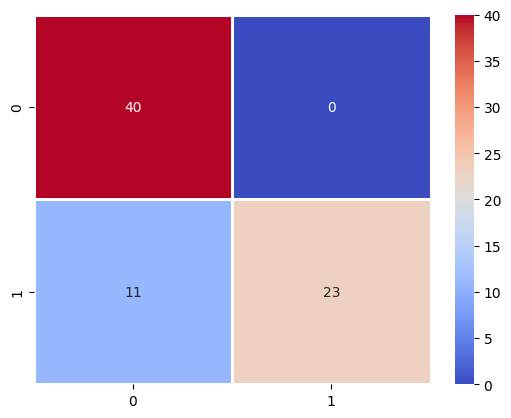

In [ ]:
resultado = modelo.predict(x=valor_teste,batch_size=10,verbose=0)
resultado = np.argmax(resultado,axis=1)
cm = confusion_matrix(y_true=resposta_teste,y_pred=resultado)
print(f"Acurácia: {(cm[0][0]+cm[1][1])/len(resposta_teste)}")
print(cm)
sns.heatmap(cm,cmap="coolwarm",annot=True,linewidth=1,fmt="d")
plt.show()


#2 abordagem

In [ ]:
import numpy as np
from PIL import Image as IMG
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os

2 exercício
_____
Nessa parte fiz a preparação dos dados fiz 2 listas uma contendo todas as imagens do homer e bart, para treino e teste e fiz 2 listas contendo as respostas para cada dado. As respostas sendo passadas para binario.

In [ ]:
diretorioTest = "/content/drive/MyDrive/IA keras]/Abordagens/dataset_personagens_imagens/dataset_personagens/test_set"
diretorioTrain = "/content/drive/MyDrive/IA keras]/Abordagens/dataset_personagens_imagens/dataset_personagens/training_set"


categoria=["bart","homer"]

arquivosTest =[]
respostaTest=[]
arquivosTrain=[]
respostaTrain=[]

arquivosTest += (os.listdir(diretorioTest+"/bart"))[:]
respostaTest += ([0] * len(os.listdir(diretorioTest+"/bart")))
arquivosTest += (os.listdir(diretorioTest+"/homer"))[:]
respostaTest += ([1] * len(os.listdir(diretorioTest+"/homer")))

arquivosTrain += (os.listdir(diretorioTrain+"/bart"))[:]
respostaTrain += ([0] * len(os.listdir(diretorioTrain+"/bart")))
arquivosTrain += (os.listdir(diretorioTrain+"/homer"))[:]
respostaTrain += ([1] * len(os.listdir(diretorioTrain+"/homer")))


2 exercício
____
fiz a formatação das imagens para um dado que a I.A. consiga entender

In [ ]:
Treino=[]
Teste=[]
entrada="/bart/"
for i in range(len(arquivosTest)):
  if (arquivosTest[i][0:4]!="bart"):
    entrada="/homer/"
  Imagem = IMG.open(diretorioTest+entrada+arquivosTest[i]).convert("L")
  Imagem = Imagem.resize((64,64))
  Imagem = np.array(Imagem)/255.0
  Teste.append(Imagem)

entrada ="/bart/"
for i in range(len(arquivosTrain)):
  if (arquivosTrain[i][0:4]!="bart"):
    entrada = "/homer/"
  Imagem = IMG.open(diretorioTrain+entrada+arquivosTrain[i]).convert("L")
  Imagem = Imagem.resize((64,64))
  Imagem = np.array(Imagem)/255.0
  Treino.append(Imagem)

Treino,respostaTrain = shuffle(Treino,respostaTrain)

Treino = np.array(Treino)
Teste = np.array(Teste)
respostaTrain = np.array(respostaTrain)
respostaTest = np.array(respostaTest)




#Preparando a I.A.
___
3 exercício
---
O tipo de rede Neural escolhida para a segunda abordagem vai ser a convolucional:

Como a I.A. vai trabalhar com imagens, então é necessário que ocorra uma preparação da imagem para que a I.A. possa dar respostas satisfatórias

____
4 exercício
---
Motivos para a configuração escolhida:

Na parte convolucional fiz 2 etapas de tratamento das imagens escolhi 64,64,1 por causa do tamanho que foi decidido para todas as imagens.
Após a vetorização dos dados, escolhi duas camadas ocultas pois após testes verifiqueei que era a que resultava em melhores resultados da I.A.

O compiler escolhi a metrica para binário visto que as respostas só podem ser 2 "bart" ou "homer"
___
5 exercício
---
explicação da configuração:

x e y são a entrada e rótulos
batch = 15 acho batch um numero que acho o suficiente para pegar o melhor resultado.

epochs = 70 foi escolhido após diversos testes para encontrar o melhor numero que evitasse overfitting, chegando no 70 como sendo a epoca que ocasionava menos desse problema

Verbose = 2, escolhido e definido para poder ver com detalhes as informações de cada epoca.

In [ ]:
modeloCnn = Sequential([
    Conv2D(32,(3,3),input_shape=(64,64,1),activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32,(3,3),activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),

    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(2,activation="softmax")
])

modeloCnn.compile(optimizer = "adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

modeloCnn.fit(x=Treino,y=respostaTrain,batch_size=15,epochs=70,verbose=2)

Epoch 1/70
14/14 - 2s - loss: 1.3583 - accuracy: 0.5102 - 2s/epoch - 177ms/step
Epoch 2/70
14/14 - 1s - loss: 0.8608 - accuracy: 0.6633 - 1s/epoch - 103ms/step
Epoch 3/70
14/14 - 1s - loss: 0.5065 - accuracy: 0.7500 - 1s/epoch - 101ms/step
Epoch 4/70
14/14 - 1s - loss: 0.4293 - accuracy: 0.8214 - 1s/epoch - 106ms/step
Epoch 5/70
14/14 - 1s - loss: 0.2763 - accuracy: 0.8520 - 1s/epoch - 79ms/step
Epoch 6/70
14/14 - 1s - loss: 0.2582 - accuracy: 0.8469 - 852ms/epoch - 61ms/step
Epoch 7/70
14/14 - 1s - loss: 0.2299 - accuracy: 0.9235 - 862ms/epoch - 62ms/step
Epoch 8/70
14/14 - 1s - loss: 0.1532 - accuracy: 0.9439 - 834ms/epoch - 60ms/step
Epoch 9/70
14/14 - 1s - loss: 0.1433 - accuracy: 0.9592 - 853ms/epoch - 61ms/step
Epoch 10/70
14/14 - 1s - loss: 0.0969 - accuracy: 0.9643 - 838ms/epoch - 60ms/step
Epoch 11/70
14/14 - 1s - loss: 0.0714 - accuracy: 0.9694 - 840ms/epoch - 60ms/step
Epoch 12/70
14/14 - 1s - loss: 0.0690 - accuracy: 0.9643 - 1s/epoch - 77ms/step
Epoch 13/70
14/14 - 1s - lo

6 exercício
---
a acuracia da I.A. foi de 46%

> porém consegui chegar no maximo de 52%



e sua matriz de confusão foi:

[[22 20]

[19 12]]

Acurácia: 0.4657534246575342
[[22 20]
 [19 12]]


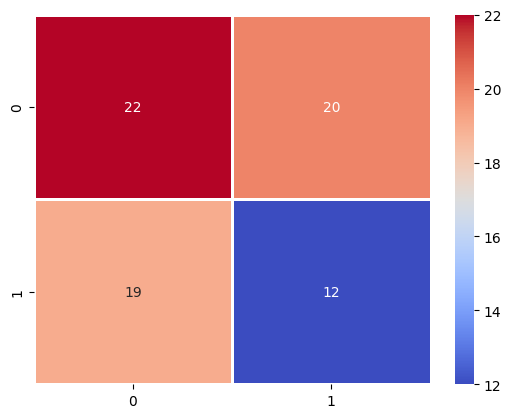

In [ ]:
predicao = modeloCnn.predict(x=Teste,batch_size=10,verbose=0)
predicao = np.argmax(predicao,axis=1)
cm = confusion_matrix(y_true=respostaTest,y_pred=predicao)
print(f"Acurácia: {(cm[0][0]+cm[1][1])/len(respostaTest)}")
print(cm)
sns.heatmap(cm,cmap="coolwarm",annot=True,linewidth=1,fmt="d")
plt.show()

#6 EXERCÍCIO

comentando resultados
---

Percebi que a I.A. da primeira abordagem resultou em uma acurácia melhor que a obtida pela 2 abordagem, com a primeira tendo 85% e  a segunda com o seu maximo sendo 52%(nesse exemplo eu acabei conseguindo menos 46% do que eu tinha conseguido anteriormente). Acredito que provavelmente possa ser devido a alguma necessidade maior de mais fotos para poder assim dar bons resultados da segunda abordagem.

Pros:


*   1 abordagem:
    
    A primeira abordagem demonstrou resultados melhores do que a segunda, acredito porque vc já entrega os valores prontos para a I.A. e só a deixa trabalhar.

    .

*   2 abordagem:
    
    A segunda abordagem é mais dinamica e independente, pois você não precisa passar o numero de cada caracteristica para a I.A. pois a mesma por meio de sua propria estrutura já encontra as caracteristicas de cada foto.


Contras:


*   1 abordagem:
   
    A primeira abordagem você precisaria ter dados que já deixassem explicito o valor de cada caracteristica limitando bastante a variedade de dados que poderiam ser usados para a I.A.

    .

*   2 abordagem:

    A segunda abordagem por conta de vc deixar a cargo da I.A. encontrar as diferenças e caracteristicas unicas de cada individuo, acaba se criando uma necessidade de mais dados de entrada, se comparado com a primeira.



